<span style="color: blue; font-size: 32px;"><strong>Interconnect Telecom Company - Customer Churn Model</strong></span> <H3>by Deborah Thomas</H3>

<span style="color: blue; font-size: 32px;"><strong>Introduction:</strong></span>

<H3>The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.</H3>

<span style="color: blue; font-size: 32px;"><strong>Questions I seek to answer:</strong></span>

- Do customers with a higher monthly charge tend to have a higher churn rate?
- Does gender, age(Senior Citizen vs non Senior Citizen), whether or not a customer has dependents, or a partner have any effect on churn rate?
- Does the payment method (Electronic check, Mailed check, Automatic Bank transfer, Automatic Credit card) influence churn rates?
- How do different account types(1-year, 2-year, month-to-month) influence churn rates?
- Do customers who pay for extra services(Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, StreamingMovies) tend not to churn as quickly as those who do not pay for these services?

<span style="color: blue; font-size: 32px;"><strong>Import Libraries:</strong></span>

In [2570]:
import pandas as pd
import numpy as np

import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

<span style="color: blue; font-size: 32px;"><strong>Load 4 Datasets:</strong></span>

- <span style="color: blue; font-size: 16px;"><strong>load contract dataset</strong></span>

In [2573]:
try:
    contract = pd.read_csv('/datasets/final_provider/contract.csv')  # Attempt to read from the server path
except FileNotFoundError:
    contract = pd.read_csv('../datasets/final_provider/contract.csv')  # Fallback to the local path


display(contract.head(10))

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


In [2574]:
contract.shape

(7043, 8)

- <span style="color: blue; font-size: 16px;"><strong>load internet dataset</strong></span>

In [2576]:
try:
    internet = pd.read_csv('/datasets/final_provider/internet.csv')  # Attempt to read from the server path
except FileNotFoundError:
    internet = pd.read_csv('../datasets/final_provider/internet.csv')  # Fallback to the local path


display(internet.head(10))

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


In [2577]:
internet.shape

(5517, 8)

- <span style="color: blue; font-size: 16px;"><strong>load personal dataset</strong></span>

In [2579]:
try:
    personal = pd.read_csv('/datasets/final_provider/personal.csv')  # Attempt to read from the server path
except FileNotFoundError:
    personal = pd.read_csv('../datasets/final_provider/personal.csv')  # Fallback to the local path


display(personal.head(10))

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


In [2580]:
personal.shape

(7043, 5)

- <span style="color: blue; font-size: 16px;"><strong>load phone dataset:</strong></span>

In [2582]:
try:
    phone = pd.read_csv('/datasets/final_provider/phone.csv')  # Attempt to read from the server path
except FileNotFoundError:
    phone = pd.read_csv('../datasets/final_provider/phone.csv')  # Fallback to the local path


display(phone.head(10))

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


In [2583]:
phone.shape

(6361, 2)

Each of the four datasets has a different shape. But they all share one column in common; customerID.

<span style="color: blue; font-size: 32px;"><strong>Exploratory Data Analysis</strong></span>

<H2>Clean the 4 datasets:</H2>

- <span style="color: blue; font-size: 18px;"><strong>Check for missing values in all 4 datasets:</strong></span>

In [2588]:
# Check for missing values in each DataFrame
missing_contract = contract.isnull().sum()
missing_internet = internet.isnull().sum()
missing_personal = personal.isnull().sum()
missing_phone = phone.isnull().sum()

In [2589]:
# Display the counts of missing values
print("Missing values in contract:\n", missing_contract)
print("\nMissing values in internet:\n", missing_internet)
print("\nMissing values in personal:\n", missing_personal)
print("\nMissing values in phone:\n", missing_phone)

Missing values in contract:
 customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Missing values in internet:
 customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Missing values in personal:
 customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Missing values in phone:
 customerID       0
MultipleLines    0
dtype: int64


<H4>There is no missing data.</H4>

- <span style="color: blue; font-size: 18px;"><strong>examine contract dataset</strong></span>

In [2592]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


- <span style="color: blue; font-size: 14px;"><strong>examine BeginDate column</strong></span>

In [2594]:
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'])

- <span style="color: blue; font-size: 14px;"><strong>examine EndDate column</strong></span>

<span style="color: red; font-size: 14px;"><strong>EndDate == 'No' is the TARGET</strong></span>

In [2597]:
contract['EndDate'].value_counts()

EndDate
No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: count, dtype: int64

In [2598]:
# 1869 is the amount of churned customers (those with dates). 5174  have not churned.

In [2599]:
contract['EndDate'] = (contract['EndDate'] != 'No').astype(int) 

If the value is not 'No', it evaluates to True, which is then converted to `1

In [2601]:
contract['EndDate'].value_counts()

EndDate
0    5174
1    1869
Name: count, dtype: int64

<span style="color: red; font-size: 14px;"><strong>0 used to be 'No'.  So now 'EndDate' == 0 is the new target.</strong></span>

- <span style="color: blue; font-size: 14px;"><strong>examine Type column</strong></span>

In [2604]:
print(contract['Type'].isna().sum())

0


In [2605]:
contract.Type.value_counts()

Type
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [2606]:
payment_type_mapping = {
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
}

In [2607]:
contract['Type'] = contract['Type'].map(payment_type_mapping)

In [2608]:
contract['Type'] = contract['Type'].astype('category')

In [2609]:
contract.Type.value_counts()

Type
0    3875
2    1695
1    1473
Name: count, dtype: int64

- <span style="color: blue; font-size: 14px;"><strong>examine PaperlessBilling column</strong></span>

In [2611]:
contract.PaperlessBilling.value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

In [2612]:
# Convert PaperlessBilling to binary (1 for 'Yes', 0 for 'No')
contract['PaperlessBilling'] = contract['PaperlessBilling'].map({'Yes': 1, 'No': 0})

In [2613]:
contract.PaperlessBilling.value_counts()

PaperlessBilling
1    4171
0    2872
Name: count, dtype: int64

In [2614]:
contract['PaperlessBilling'].dtype

dtype('int64')

- <span style="color: blue; font-size: 14px;"><strong>examine PaymentMethod column</strong></span>

In [2616]:
contract['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [2617]:
payment_method_mapping = {
    'Electronic check': 0,
    'Mailed check': 1,
    'Bank transfer (automatic)': 2,
    'Credit card (automatic)': 3
}

In [2618]:
contract['PaymentMethod'] = contract['PaymentMethod'].map(payment_method_mapping)

In [2619]:
contract['PaymentMethod'].value_counts()

PaymentMethod
0    2365
1    1612
2    1544
3    1522
Name: count, dtype: int64

- 0 = 'Electronic check'
- 1 = 'Mailed check'
- 2 = 'Bank transfer (automatic)'
- 3 = 'Credit card (automatic)'

In [2621]:
contract['PaymentMethod'] = contract['PaymentMethod'].astype('category')

In [2622]:
contract['PaymentMethod'].value_counts()

PaymentMethod
0    2365
1    1612
2    1544
3    1522
Name: count, dtype: int64

In [2623]:
contract['PaymentMethod'].dtype

CategoricalDtype(categories=[0, 1, 2, 3], ordered=False, categories_dtype=int64)

- <span style="color: blue; font-size: 14px;"><strong>examine TotalCharges column</strong></span>

In [2625]:
contract.TotalCharges.value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [2626]:
# Replace any white space with nan
contract['TotalCharges'] = contract['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)

In [2627]:
#Convert the column to a numeric type, coercing any errors to NaN
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')

In [2628]:
contract['TotalCharges'] = contract['TotalCharges'].astype(float)

- <span style="color: blue; font-size: 14px;"><strong>double check data types for the contract dataset:</strong></span>

In [2630]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   int64         
 3   Type              7043 non-null   category      
 4   PaperlessBilling  7043 non-null   int64         
 5   PaymentMethod     7043 non-null   category      
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 344.4+ KB


- <span style="color: blue; font-size: 18px;"><strong>examine internet dataset</strong></span>

In [2632]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


- <span style="color: blue; font-size: 14px;"><strong>examine InternetService column</strong></span>

In [2634]:
internet['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
Name: count, dtype: int64

In [2635]:
internet_service_mapping = {
    'Fiber optic': 1,
    'DSL': 0
}

In [2636]:
internet['InternetService'] = internet['InternetService'].map(internet_service_mapping)

In [2637]:
internet['InternetService'].dtype

dtype('int64')

- <span style="color: blue; font-size: 14px;"><strong>examine OnlineSecurity column</strong></span>

In [2639]:
internet['OnlineSecurity'].value_counts()

OnlineSecurity
No     3498
Yes    2019
Name: count, dtype: int64

In [2640]:
#Convert to boolean
internet['OnlineSecurity'] = internet['OnlineSecurity'].map({'Yes': 1, 'No': 0})

In [2641]:
internet['OnlineSecurity'].dtype

dtype('int64')

- <span style="color: blue; font-size: 14px;"><strong>examine OnlineBackup column</strong></span>

In [2643]:
internet.OnlineBackup.value_counts()

OnlineBackup
No     3088
Yes    2429
Name: count, dtype: int64

In [2644]:
# Convert 'OnlineBackup' column to boolean type
internet['OnlineBackup'] = internet['OnlineBackup'].map({'Yes': 1, 'No': 0})

In [2645]:
internet['OnlineBackup'].dtype

dtype('int64')

- <span style="color: blue; font-size: 14px;"><strong>examine DeviceProtection column</strong></span>

In [2647]:
internet.DeviceProtection.value_counts()

DeviceProtection
No     3095
Yes    2422
Name: count, dtype: int64

In [2648]:
internet['DeviceProtection'] = internet['DeviceProtection'].map({'Yes': 1, 'No': 0})

In [2649]:
internet.DeviceProtection.value_counts()

DeviceProtection
0    3095
1    2422
Name: count, dtype: int64

In [2650]:
internet['DeviceProtection'].dtype

dtype('int64')

- <span style="color: blue; font-size: 14px;"><strong>examine TechSupport column</strong></span>

In [2652]:
internet.TechSupport.value_counts()

TechSupport
No     3473
Yes    2044
Name: count, dtype: int64

In [2653]:
internet['TechSupport'] = internet['TechSupport'].map({'Yes': 1, 'No': 0})

In [2654]:
internet.TechSupport.value_counts()

TechSupport
0    3473
1    2044
Name: count, dtype: int64

In [2655]:
internet['TechSupport'].dtype

dtype('int64')

- <span style="color: blue; font-size: 14px;"><strong>examine StreamingTV column</strong></span>

In [2657]:
internet.StreamingTV.value_counts()

StreamingTV
No     2810
Yes    2707
Name: count, dtype: int64

In [2658]:
internet['StreamingTV'] = internet['StreamingTV'].map({'Yes': 1, 'No': 0})

In [2659]:
internet['StreamingTV'].value_counts()

StreamingTV
0    2810
1    2707
Name: count, dtype: int64

In [2660]:
internet['StreamingTV'].dtype

dtype('int64')

- <span style="color: blue; font-size: 14px;"><strong>examine StreamingMovies column</strong></span>

In [2662]:
internet.StreamingMovies.value_counts()

StreamingMovies
No     2785
Yes    2732
Name: count, dtype: int64

In [2663]:
internet['StreamingMovies'] = internet['StreamingMovies'].map({'Yes': 1, 'No': 0})

In [2664]:
internet['StreamingMovies'].value_counts()

StreamingMovies
0    2785
1    2732
Name: count, dtype: int64

In [2665]:
internet['StreamingMovies'].dtype

dtype('int64')

- <span style="color: blue; font-size: 14px;"><strong>double check data types of internet dataset:</strong></span>

In [2667]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   int64 
 2   OnlineSecurity    5517 non-null   int64 
 3   OnlineBackup      5517 non-null   int64 
 4   DeviceProtection  5517 non-null   int64 
 5   TechSupport       5517 non-null   int64 
 6   StreamingTV       5517 non-null   int64 
 7   StreamingMovies   5517 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 344.9+ KB


- <span style="color: blue; font-size: 18px;"><strong>examine personal dataset</strong></span>

In [2669]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


- <span style="color: blue; font-size: 14px;"><strong>examine gender column</strong></span>

In [2671]:
personal.gender.value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [2672]:
personal['gender'] = personal['gender'].map({'Male': 1, 'Female': 0})

In [2673]:
personal.gender.value_counts()

/Users/wranglerdeb/anaconda3/lib/python3.11/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


gender
1    3555
0    3488
Name: count, dtype: int64

In [2674]:
personal['gender'].dtypes

dtype('int64')

- <span style="color: blue; font-size: 14px;"><strong>examine SeniorCitizen column</strong></span>

In [2676]:
personal.SeniorCitizen.value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [2677]:
personal['SeniorCitizen'].dtype

dtype('int64')

- <span style="color: blue; font-size: 14px;"><strong>examine Partner column</strong></span>

In [2679]:
personal.Partner.value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [2680]:
personal['Partner'] = personal['Partner'].map({'Yes': 1, 'No': 0})

In [2681]:
personal.Partner.value_counts()

Partner
0    3641
1    3402
Name: count, dtype: int64

In [2682]:
personal['Partner'].dtype

dtype('int64')

- <span style="color: blue; font-size: 14px;"><strong>examine Dependents column</strong></span>

In [2684]:
personal.Dependents.value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [2685]:
personal['Dependents'] = personal['Dependents'].map({'Yes': 1, 'No': 0})

In [2686]:
personal.Dependents.value_counts()

Dependents
0    4933
1    2110
Name: count, dtype: int64

In [2687]:
personal['Partner'].dtype

dtype('int64')

- <span style="color: blue; font-size: 14px;"><strong>double check the data types in the personal dataset:</strong></span>

In [2689]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   int64 
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   int64 
 4   Dependents     7043 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 275.2+ KB


- <span style="color: blue; font-size: 18px;"><strong>examine phone dataset</strong></span>

In [2691]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


- <span style="color: blue; font-size: 14px;"><strong>examine MultipleLines column</strong></span>

In [2693]:
phone.MultipleLines.value_counts()

MultipleLines
No     3390
Yes    2971
Name: count, dtype: int64

In [2694]:
phone['MultipleLines'] = phone['MultipleLines'].map({'No': 0, 'Yes': 1})

In [2695]:
phone['MultipleLines'].dtype

dtype('int64')

- <span style="color: blue; font-size: 14px;"><strong>double check the data types in the phone dataset:</strong></span>

In [2697]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 99.5+ KB


<H2>Merge Dataframes:</H2>

- <span style="color: blue; font-size: 14px;"><strong>Add indexes on the customerID columns before merging:</strong></span>

In [2700]:
contract.set_index('customerID', inplace=True)
internet.set_index('customerID', inplace=True)
personal.set_index('customerID', inplace=True)
phone.set_index('customerID', inplace=True)

In [2701]:
# Then merge using the indexes
merged_df = contract.join([internet, personal, phone], how='outer')

In [2702]:
merged_df.reset_index(inplace=True)

In [2703]:
display(merged_df.head(10)) 

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,0,0,1,0,29.85,29.85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,NaN
1,5575-GNVDE,2017-04-01,0,1,0,1,56.95,1889.50,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0.0
2,3668-QPYBK,2019-10-01,1,0,1,1,53.85,108.15,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0.0
3,7795-CFOCW,2016-05-01,0,1,0,2,42.30,1840.75,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1,0,0,0,NaN
4,9237-HQITU,2019-09-01,1,0,1,0,70.70,151.65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
5,9305-CDSKC,2019-03-01,1,0,1,0,99.65,820.50,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0,0,0,0,1.0
6,1452-KIOVK,2018-04-01,0,0,1,3,89.10,1949.40,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,0,1,1.0
7,6713-OKOMC,2019-04-01,0,0,0,1,29.75,301.90,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,NaN
8,7892-POOKP,2017-07-01,1,0,1,0,104.80,3046.05,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0,0,1,0,1.0
9,6388-TABGU,2014-12-01,0,1,0,2,56.15,3487.95,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0,0,1,0.0


In [2704]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   int64         
 3   Type              7043 non-null   category      
 4   PaperlessBilling  7043 non-null   int64         
 5   PaymentMethod     7043 non-null   category      
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   InternetService   5517 non-null   float64       
 9   OnlineSecurity    5517 non-null   float64       
 10  OnlineBackup      5517 non-null   float64       
 11  DeviceProtection  5517 non-null   float64       
 12  TechSupport       5517 non-null   float64       
 13  StreamingTV       5517 non-null   float64       
 14  StreamingMovies   5517 n

These columns' data types have been altered, after the merge:
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
They will need to be changed back to type int64.

- <span style="color: blue; font-size: 16px;"><strong>convert datatypes again</strong></span>

In [2707]:
# Convert MultipleLines back to int64
merged_df['MultipleLines'] = merged_df['MultipleLines'].fillna(0).astype('int64')

In [2708]:
columns_to_convert = [
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
]

In [2709]:
for column in columns_to_convert:
    merged_df[column] = merged_df[column].fillna(0).astype('int64')

In [2710]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   int64         
 3   Type              7043 non-null   category      
 4   PaperlessBilling  7043 non-null   int64         
 5   PaymentMethod     7043 non-null   category      
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   InternetService   7043 non-null   int64         
 9   OnlineSecurity    7043 non-null   int64         
 10  OnlineBackup      7043 non-null   int64         
 11  DeviceProtection  7043 non-null   int64         
 12  TechSupport       7043 non-null   int64         
 13  StreamingTV       7043 non-null   int64         
 14  StreamingMovies   7043 n

<H2>Data Visualization:</H2>

- <span style="color: blue; font-size: 16px;"><strong>create a heat map of the merged data set:</strong></span>

In [2713]:
# Convert the DataFrame to numeric, coercing errors to NaN
numeric_df = merged_df.apply(pd.to_numeric, errors='coerce')

In [2714]:
correlation_matrix = numeric_df.corr()

In [2715]:
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

/Users/wranglerdeb/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


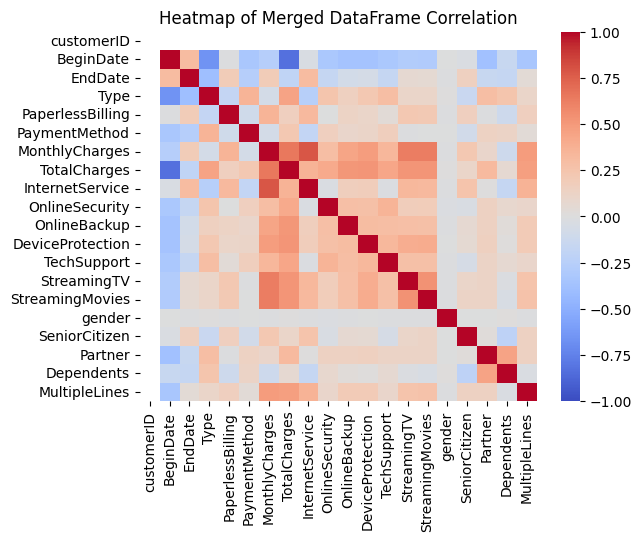

In [2716]:
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmax=1, vmin=-1)
plt.title("Heatmap of Merged DataFrame Correlation")
plt.show()

The scale goes from -1 to 1.

- -1 indicates a perfect negative correlation between two variables. This means that as one variable increases, the other variable decreases.
- 0 indicates no correlation. This means changes in one variable do not affect the other.
- 1 indicates a perfect positive correlation. This means that both variables increase or decrease together.

<b>There is a very strong posive correlation between:</b>
- MonthlyCharges and InternetService

<b>There is a positive correlation between:</b>
- MonthlyCharges and StreamingTV
- MonthlyCharges and StreamingMovies
- MonthlyCharges and TotalCharges

<b>There is a very strong negative correlation between:</b>
- Begin Date and Total Monthly Charges
- Type (length of contract) and Begin Date

<b>As for our taget(EndDate), there is not a strong positive, nor a strong negative correlation, between the other columns.</b>
There is a slight positive correlation between:
- End Date and Internet Service
- End Date and Begin Date

There is a slight negative correlation between:
- End Date and Type(length of contract)

- <span style="color: blue; font-size: 16px;"><strong>create a graph for Senior Citizen vs Monthly Charges:</strong></span>

In [2720]:
filtered_data = merged_df[merged_df['EndDate'] == False]

In [2721]:
print(filtered_data['SeniorCitizen'].value_counts(normalize=True) * 100)

SeniorCitizen
0    87.127947
1    12.872053
Name: proportion, dtype: float64


In [2722]:
def plot_senior_citizen_analysis(filtered_data):
    plt.figure(figsize=(12, 5))
    
    # Plot 1: Bar chart for mean monthly charges
    plt.subplot(1, 2, 1)
    mean_charges = filtered_data.groupby('SeniorCitizen')['MonthlyCharges'].mean()
    bars = plt.bar([0, 1], mean_charges.values)
    plt.title('Mean Monthly Charges by Senior Citizen Status')
    plt.xlabel('Senior Citizen')
    plt.ylabel('Mean Monthly Charges ($)')
    plt.xticks([0, 1], ['Non-Senior', 'Senior'])
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2., height,
                 f'${height:.2f}',
                 ha='center', va='bottom')
    
    # Plot 2: Pie chart for count distribution
    plt.subplot(1, 2, 2)
    count_by_senior = filtered_data['SeniorCitizen'].value_counts(normalize=True) * 100
    plt.pie(count_by_senior.values, 
            labels=['Non-Senior', 'Senior'],
            autopct='%1.1f%%')
    plt.title('Distribution of Senior Citizens')
    
    plt.tight_layout()
    plt.show()


In [2723]:
print("Senior Citizen Distribution:")
print(filtered_data['SeniorCitizen'].value_counts(normalize=True) * 100)

Senior Citizen Distribution:
SeniorCitizen
0    87.127947
1    12.872053
Name: proportion, dtype: float64


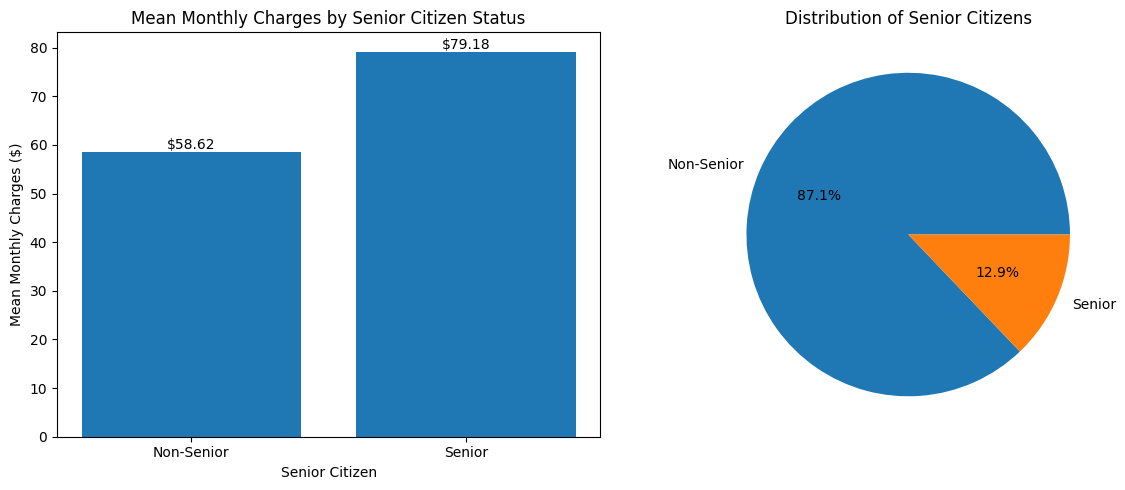

In [2724]:
plot_senior_citizen_analysis(filtered_data)

SeniorCitizen customers have a higher average monthly charge, about 10% higher than non SeniorCitizens.

<H2>Do customers with a higher monthly charge tend to have a higher churn rate?</H2>

- <span style="color: blue; font-size: 14px;"><strong>find min, mean, max, 75\% quantile:</strong></span>

In [2728]:
merged_df['MonthlyCharges'].min()

18.25

In [2729]:
merged_df['MonthlyCharges'].mean()

64.76169246059918

In [2730]:
merged_df['MonthlyCharges'].max()

118.75

In [2731]:
quantile_75 = merged_df['MonthlyCharges'].quantile(0.75)
print(quantile_75)

89.85


- <span style="color: blue; font-size: 14px;"><strong>find all the monthly charges higher than the 75\% quantile:</strong></span>

In [2733]:
# Create a Series with values of MonthlyCharges that are above the 75% quartile
high_charges_values = merged_df['MonthlyCharges'][merged_df['MonthlyCharges'] > quantile_75]
print(high_charges_values)

5        99.65
8       104.80
12      100.35
13      103.70
14      105.50
         ...  
7023    103.50
7025     95.05
7034    102.95
7039    103.20
7042    105.65
Name: MonthlyCharges, Length: 1758, dtype: float64


In [2734]:
# Sort the values from small to large
high_charges_values_sorted = high_charges_values.sort_values()
print(high_charges_values_sorted.head(5))

844     89.9
61      89.9
3051    89.9
5956    89.9
2217    89.9
Name: MonthlyCharges, dtype: float64


- <span style="color: blue; font-size: 14px;"><strong>create data frame:</strong></span>

In [2736]:
# Filter merged_df to get only the rows where MonthlyCharges is above the 75% quartile
high_charges_df = merged_df[merged_df['MonthlyCharges'] > quantile_75]
display(high_charges_df.head(5))

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
5,9305-CDSKC,2019-03-01,1,0,1,0,99.65,820.50,1,0,0,1,0,1,1,0,0,0,0,1
8,7892-POOKP,2017-07-01,1,0,1,0,104.80,3046.05,1,0,0,1,1,1,1,0,0,1,0,1
12,8091-TTVAX,2015-04-01,0,1,0,3,100.35,5681.10,1,0,0,1,0,1,1,1,0,1,0,1
13,0280-XJGEX,2015-09-01,1,0,1,2,103.70,5036.30,1,0,1,1,0,1,1,1,0,0,0,1
14,5129-JLPIS,2018-01-01,0,0,1,0,105.50,2686.05,1,1,0,1,1,1,1,1,0,0,0,0


- <span style="color: blue; font-size: 14px;"><strong>create buckets for the graph:</strong></span>

In [2738]:
# Create buckets for the sorted values
buckets = pd.cut(high_charges_values_sorted, bins=10)

In [2739]:
# Count occurrences in each bucket for customers with an EndDate
bucket_counts_with_enddate = high_charges_df[high_charges_df['EndDate'] == 1].groupby(buckets).size()

/var/folders/g4/hkwrz_hd06s7mxk8_15fr9jh0000gn/T/ipykernel_1700/1448720845.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_counts_with_enddate = high_charges_df[high_charges_df['EndDate'] == 1].groupby(buckets).size()


In [2740]:
bucket_counts_sorted = bucket_counts_with_enddate.sort_index()

- <span style="color: blue; font-size: 14px;"><strong>Find percentage of churn rate:</strong></span>

In [2742]:
# Count how many of these have churned
churned_high_count = high_charges_df[high_charges_df['EndDate'] == 1].shape[0]

print(f'Number of customers with high monthly charges who have churned: {churned_high_count}')

Number of customers with high monthly charges who have churned: 578


In [2743]:
total_count_high_churned = len(merged_df)

In [2744]:
churn_ratio = churned_high_count / total_count_high_churned

In [2745]:
churn_percentage = churn_ratio * 100
print(f'\033[1m\033[91mChurn percentage of high paying customers: {churn_percentage:.2f}%\033[0m')

Churn percentage of high paying customers: 8.21%


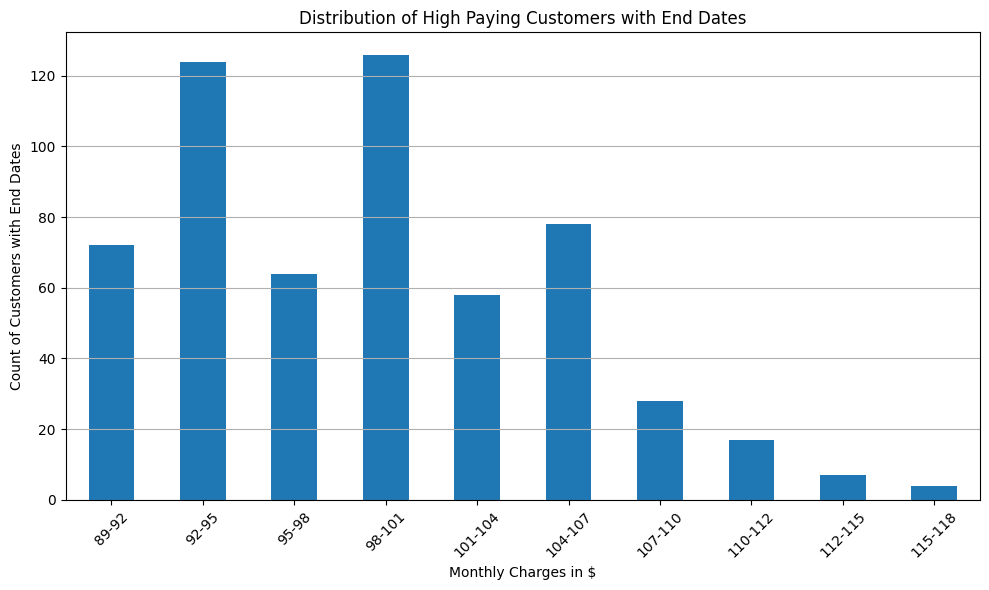

In [2746]:
plt.figure(figsize=(10, 6))
bucket_counts_sorted.plot(kind='bar')

plt.title('Distribution of High Paying Customers with End Dates')
plt.xlabel('Monthly Charges in $')
plt.ylabel('Count of Customers with End Dates')

# Format tick labels to show ranges in whole numbers
tick_labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in bucket_counts_sorted.index]
plt.gca().set_xticklabels(tick_labels, rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

<span style="color: red"><strong>Answer: No, customers with a higher monthly charge are not more likely to have a higher churn rate.</span>
- Of the customers with the highest monthly bills, only <span style="color: red">8.2%</strong></span> of them have churned. 
- As the amount of monthly charges to up, the amount of churning does not go up.

<span style="color: blue; font-size: 32px;"><strong>Questions:</strong></span>

<H2>Does gender, age(Senior Citizen vs non Senior Citizen), whether or not a customer has dependents, or a partner, have any effect on churn rate?</H2>

- <span style="color: blue; font-size: 14px;"><strong>Look at dispersion of customers genders:</strong></span>

In [2750]:
merged_df.gender.value_counts()

gender
1    3555
0    3488
Name: count, dtype: int64

In [2751]:
total_rows = len(merged_df)

In [2752]:
male_total = merged_df[merged_df['gender'] == 1].shape[0]
female_total = merged_df[merged_df['gender'] == 0].shape[0]

In [2753]:
# Calculate percentages
male_percent = (male_total / len(merged_df) * 100)
female_percent = (female_total / len(merged_df) * 100)

In [2754]:
print(f'Percentage of Male customers: {male_percent:.2f}%')
print(f'Percentage of Female customers: {female_percent:.2f}%')

Percentage of Male customers: 50.48%
Percentage of Female customers: 49.52%


The percentage of male vs female customers is amost evenly dispersed.

- <span style="color: blue; font-size: 14px;"><strong>Find percentage of churned genders:</strong></span>

In [2757]:
# Count the number of churned customers by gender
churned_counts = merged_df[merged_df['EndDate'] == 1]['gender'].value_counts()

In [2758]:
print("Churned customers by gender:")
print(churned_counts)

Churned customers by gender:
gender
0    939
1    930
Name: count, dtype: int64


<span style="color: red; font-size: 24px;"><strong>Answer: No, gender is not related to churn rate.</span>
- There is an almost even balance of male and female customers. There is an almost even balance of male and female churned customers.

- <span style="color: blue; font-size: 14px;"><strong>Look at age dispersion of customers:</strong></span>

In [2954]:
merged_df.SeniorCitizen.value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [2956]:
print(merged_df['SeniorCitizen'].value_counts(normalize=True) * 100)

SeniorCitizen
0    83.785319
1    16.214681
Name: proportion, dtype: float64


84\% of customers are not Senior Citizens.

- <span style="color: blue; font-size: 14px;"><strong>Find percentage of churned customers for SeniorCitizen vs nonSeniorCitizen:</strong></span>

In [2764]:
nonSenior_total = merged_df[merged_df['SeniorCitizen'] == 0].shape[0]
print(nonSenior_total)

senior_total = merged_df[merged_df['SeniorCitizen'] == 1].shape[0]
print(senior_total)

5901
1142


In [2765]:
# Calculate the percentage of churned seniors and non-seniors
senior_churn_percentage = (merged_df[(merged_df['SeniorCitizen'] == 1) & (merged_df['EndDate'] == 1)].shape[0] / senior_total * 100)

nonSenior_churn_percentage = (merged_df[(merged_df['SeniorCitizen'] == 0) & (merged_df['EndDate'] == 1)].shape[0] / nonSenior_total * 100)

In [2766]:
print(f'Percentage of Senior customers who have churned: {senior_churn_percentage:.2f}%')
print(f'Percentage of Non Senior customers who have not churned: {nonSenior_churn_percentage:.2f}%')

Percentage of Senior customers who have churned: 41.68%
Percentage of Non Senior customers who have not churned: 23.61%


<span style="color: green; font-size: 24px;"><strong>Answer: Yes, age is related to churn rate. Senior Citizens are more likely to churn.</span>
- The churn rate, for  Senior Citizens is 41.68\%. That is almost double the churn rate of non Senior Citizens.

- <span style="color: blue; font-size: 14px;"><strong>Look at dispersion of Dependents:</strong></span>

In [2769]:
merged_df.Dependents.value_counts()

Dependents
0    4933
1    2110
Name: count, dtype: int64

In [2770]:
print(merged_df['Dependents'].value_counts(normalize=True) * 100)

Dependents
0    70.041176
1    29.958824
Name: proportion, dtype: float64


Only 30\% of customers have dependents.

- <span style="color: blue; font-size: 14px;"><strong>Look at percentage of Dependents who churn:</strong></span>

In [2772]:
depend_total = merged_df[merged_df['Dependents'] == 1].shape[0]
nonDepend_total = merged_df[merged_df['Dependents'] == 0].shape[0]

In [2773]:
dependent_churn_percentage = (merged_df[(merged_df['Dependents'] == 1) & (merged_df['EndDate'] == 1)].shape[0] / depend_total * 100)

nonDependent_churn_percentage = (merged_df[(merged_df['Dependents'] == 0) & (merged_df['EndDate'] == 1)].shape[0] / nonDepend_total * 100)

In [2774]:
print(f'Percentage of customers who have dependents, who have churned: {dependent_churn_percentage:.2f}%')
print(f'Percentage of customers who do not have dependents, who have churned: {nonDependent_churn_percentage:.2f}%')

Percentage of customers who have dependents, who have churned: 15.45%
Percentage of customers who do not have dependents, who have churned: 31.28%


<span style="color: green; font-size: 24px;">Answer: Yes, having dependents does have an effect on churn rate.
- customers without dependents are more likely to churn.
- customers without dependents have a 31.3\% churn rate, and are twice as likely to churn, than customers who do have dependents.</span>

- <span style="color: blue; font-size: 14px;"><strong>Look at Partner vs churn rate:</strong></span>

In [2777]:
print(merged_df['Partner'].value_counts(normalize=True) * 100)

Partner
0    51.69672
1    48.30328
Name: proportion, dtype: float64


Dispersion for customers who have a Partner, vs those who do not have a Partner, is almost an even dispersion.

In [2779]:
partner_total = merged_df[merged_df['Partner'] == 1].shape[0]
nonPartner_total = merged_df[merged_df['Partner'] == 0].shape[0]

In [2780]:
partner_churn_percentage = (merged_df[(merged_df['Partner'] == 1) & (merged_df['EndDate'] == 1)].shape[0] / depend_total * 100)

nonPartner_churn_percentage = (merged_df[(merged_df['Partner'] == 0) & (merged_df['EndDate'] == 1)].shape[0] / nonDepend_total * 100)

In [2781]:
print(f'Percentage of customers who have partners, who have churned: {partner_churn_percentage:.2f}%')
print(f'Percentage of customers who do not have partners, who have churned: {nonPartner_churn_percentage:.2f}%')

Percentage of customers who have partners, who have churned: 31.71%
Percentage of customers who do not have partners, who have churned: 24.33%


<span style="color: green; font-size: 24px;"><strong>Answer: Yes, having a partner does have an effect on churn rate.</strong><br>
- Customers with a partner are more likely to churn.<br>
- Customers with a partner have a 31.7% churn rate and are about 30% more likely to churn than customers who do not have a partner.</span>

<H2>Does the payment method (Electronic check, Mailed check, Automatic Bank transfer, Automatic Credit card) influence churn rates?</H2>

In [2784]:
print(merged_df.PaymentMethod.value_counts())

PaymentMethod
0    2365
1    1612
2    1544
3    1522
Name: count, dtype: int64


<H4>'Electronic check' is  0, 'Mailed check' is  1, 'Bank transfer (automatic)' is 2, 'Credit card (automatic)' is  3</H4>

In [2786]:
payElec_total = merged_df[merged_df['PaymentMethod'] == 0].shape[0]
payMail_total = merged_df[merged_df['PaymentMethod'] == 1].shape[0]

payBank_total = merged_df[merged_df['PaymentMethod'] == 2].shape[0]
payCC_total = merged_df[merged_df['PaymentMethod'] == 3].shape[0]

In [2787]:
payElec_churn_percentage = (merged_df[(merged_df['PaymentMethod'] == 0) & (merged_df['EndDate'] == 1)].shape[0] / payElec_total * 100)

payMail_churn_percentage = (merged_df[(merged_df['PaymentMethod'] == 1) & (merged_df['EndDate'] == 1)].shape[0] / payMail_total * 100)

payBank_churn_percentage = (merged_df[(merged_df['PaymentMethod'] == 2) & (merged_df['EndDate'] == 1)].shape[0] / payBank_total * 100)

payCC_churn_percentage = (merged_df[(merged_df['PaymentMethod'] == 3) & (merged_df['EndDate'] == 1)].shape[0] / payCC_total * 100)

In [2788]:
print(f'Percentage of customers who pay by Electronic check, who have churned: {payElec_churn_percentage:.2f}%')
print(f'Percentage of customers who pay by Mail, who have churned: {payMail_churn_percentage:.2f}%')
print('\n')
print(f'Percentage of customers who pay by Bank transfer, who have churned: {payBank_churn_percentage:.2f}%')
print(f'Percentage of customers who pay by Credit Card, who have churned: {payCC_churn_percentage:.2f}%')

Percentage of customers who pay by Electronic check, who have churned: 45.29%
Percentage of customers who pay by Mail, who have churned: 19.11%


Percentage of customers who pay by Bank transfer, who have churned: 16.71%
Percentage of customers who pay by Credit Card, who have churned: 15.24%


<span style="color: green; font-size: 24px;"><strong>Answer: Yes, method of payment does have an effect on churn rate.</strong><br>
- Customers who pay by Electronic check are more likely to churn.<br>
- Customers who pay by Electronic check have a 45.3\% churn rate, which is more than double the churn rate of any other method of payment.</span>

<H2>How do different account types(1-year, 2-year, month-to-month) influence churn rates?</H2>

In [2791]:
print(merged_df.Type.value_counts())

Type
0    3875
2    1695
1    1473
Name: count, dtype: int64


<H4>'Month-to-month' is  0, 'One year' is 1, 'Two year' is  2</H4>

In [2793]:
print(merged_df['Type'].value_counts(normalize=True) * 100)

Type
0    55.019168
2    24.066449
1    20.914383
Name: proportion, dtype: float64


More than half of the customers are on the month-to-month plan.

In [2795]:
month_total = merged_df[merged_df['Type'] == 0].shape[0]
oneYear_total = merged_df[merged_df['Type'] == 1].shape[0]

twoYear_total = merged_df[merged_df['Type'] == 2].shape[0]

In [2796]:
month_churn_percentage = (merged_df[(merged_df['Type'] == 0) & (merged_df['EndDate'] == 1)].shape[0] / month_total * 100)

oneYear_churn_percentage = (merged_df[(merged_df['Type'] == 1) & (merged_df['EndDate'] == 1)].shape[0] / oneYear_total * 100)

twoYear_churn_percentage = (merged_df[(merged_df['Type'] == 2) & (merged_df['EndDate'] == 1)].shape[0] / twoYear_total * 100)

In [2902]:
print('\n')
print(f'Percentage of customers who are on the month-to-month plan, who have churned: {month_churn_percentage:.2f}%')
print(f'Percentage of customers who are on the one-year plan, who have churned: {oneYear_churn_percentage:.2f}%')
print('\n')
print(f'Percentage of customers who are on the two-year plan, who have churned: {twoYear_churn_percentage:.2f}%')



Percentage of customers who are on the month-to-month plan, who have churned: 42.71%
Percentage of customers who are on the one-year plan, who have churned: 11.27%


Percentage of customers who are on the two-year plan, who have churned: 2.83%


<span style="color: green; font-size: 24px;"><strong>Answer: Yes, type of plan does have an effect on churn rate.</strong><br>
- Customers who are on the month-to-month plan are more likely to churn.<br>
- Customers who are on the month-to-month plan have a 42.7\% churn rate, which is almost 4 times more than the churn rate of customers who are on the one-year plan, and 15 times more likely to churn than customers who are on the two-year plan.</span>

<H2>Do customers who pay for extra services(Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, StreamingMovies) tend not to churn as quickly as those who do not pay for these services?</H2>

In [2963]:
print(merged_df.InternetService.value_counts())

InternetService
0    3947
1    3096
Name: count, dtype: int64


In [2967]:
print(merged_df.OnlineSecurity.value_counts())

OnlineSecurity
0    5024
1    2019
Name: count, dtype: int64


In [2971]:
print(merged_df.OnlineBackup.value_counts())

OnlineBackup
0    4614
1    2429
Name: count, dtype: int64


In [2973]:
print(merged_df.DeviceProtection.value_counts())

DeviceProtection
0    4621
1    2422
Name: count, dtype: int64


In [2975]:
print(merged_df.TechSupport.value_counts())

TechSupport
0    4999
1    2044
Name: count, dtype: int64


In [2977]:
print(merged_df.StreamingTV.value_counts())

StreamingTV
0    4336
1    2707
Name: count, dtype: int64


In [2979]:
print(merged_df.StreamingMovies.value_counts())

StreamingMovies
0    4311
1    2732
Name: count, dtype: int64


In [ ]:
def churnEffect(

<span style="color: blue; font-size: 32px;"><strong>Steps to Resolve these questions:</strong></span>

## Preprocessing Steps
- **Import Libraries**: Import necessary libraries for data analysis and modeling.
- **Load Datasets**: Load the 4 datasets.
- **Change Data Types**: Convert categorical data to 0's and 1's for better model handling.
- **Merge Datasets**: Merge the 4 datasets on the `customerID` column.
## Exploratory Data Analysis (EDA)
- **Correlation Analysis**: Look for correlations between features.
- **Visualizations**: Create visual data representations.
## Model Creation
1. **Data Splitting**: Split the merged dataset into training, validation, and test sets.
2. **Model Selection**:
   - Logistic Regression (as a sanity check)
   - Random Forest
   - Decision Tree
   - Gradient Boosting
   - Support Vector Machines (SVM)
3. **Tweak model parameters**
## Score Models
- **Metrics**: Use AUC/ROC and Accuracy to evaluate performance.
  
### Score Assessment Criteria
| AUC-ROC          | Score Points |
|------------------|--------------|
| < 0.75           | 0 SP         |
| 0.75 ≤ AUC-ROC < 0.81 | 4 SP   |
| 0.81 ≤ AUC-ROC < 0.85 | 4.5 SP |
| 0.85 ≤ AUC-ROC < 0.87 | 5 SP   |
| 0.87 ≤ AUC-ROC < 0.88 | 5.5 SP |
| ≥ 0.88           | 6 SP         |
## Write Conclusion
- **Analysis**: Answer the questions related to churn.
- **Feature Importance**: Explain which features have a direct correlation to customer churn.
- **Model Comparison**: Sum up the models' scores and describe the best-performing model.